In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os
# Tensorflow 相關套件
import tensorflow as tf
from tensorflow.keras import datasets, layers, Model, Sequential, losses

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [17]:
dataframes = []
Path = '/kaggle/input/aia-xt122-cv-kaggle/train'
# 遍歷資料夾中的文件
for sub in os.listdir(Path):
    file_path = os.path.join(Path, sub)
    for filename in os.listdir(file_path):
        file_jpg_path = os.path.join(file_path, filename)
        dataframes.append([file_jpg_path,sub])

# print(dataframes)
sorted_df = pd.DataFrame(dataframes, columns=['file_jpg_path', 'label'])
# sorted_df = cc.sort_values(by='label').reset_index(drop=True)
sorted_df

,file_jpg_path,label
0,/kaggle/input/aia-xt122-cv-kaggle/train/inside...,insidecity
1,/kaggle/input/aia-xt122-cv-kaggle/train/inside...,insidecity
2,/kaggle/input/aia-xt122-cv-kaggle/train/inside...,insidecity
3,/kaggle/input/aia-xt122-cv-kaggle/train/inside...,insidecity
4,/kaggle/input/aia-xt122-cv-kaggle/train/inside...,insidecity
...,...,...
2686,/kaggle/input/aia-xt122-cv-kaggle/train/store/...,store
2687,/kaggle/input/aia-xt122-cv-kaggle/train/store/...,store
2688,/kaggle/input/aia-xt122-cv-kaggle/train/store/...,store
2689,/kaggle/input/aia-xt122-cv-kaggle/train/store/...,store


In [18]:
dataframes = []
Path = '/kaggle/input/aia-xt122-cv-kaggle/test'
# 遍歷資料夾中的文件
for sub in os.listdir(Path):
    file_jpg_path = os.path.join(Path, sub)
    dataframes.append([file_jpg_path,0])

# print(dataframes)
test_df = pd.DataFrame(dataframes, columns=['file_jpg_path', 'label'])
test_df

,file_jpg_path,label
0,/kaggle/input/aia-xt122-cv-kaggle/test/6JXEAHW...,0
1,/kaggle/input/aia-xt122-cv-kaggle/test/1IGAUUW...,0
2,/kaggle/input/aia-xt122-cv-kaggle/test/K5NLYV7...,0
3,/kaggle/input/aia-xt122-cv-kaggle/test/PFBZV8Y...,0
4,/kaggle/input/aia-xt122-cv-kaggle/test/9OB7FWN...,0
...,...,...
1789,/kaggle/input/aia-xt122-cv-kaggle/test/PEG259M...,0
1790,/kaggle/input/aia-xt122-cv-kaggle/test/QHYZKOX...,0
1791,/kaggle/input/aia-xt122-cv-kaggle/test/VYFDK9W...,0
1792,/kaggle/input/aia-xt122-cv-kaggle/test/KUO02C5...,0


In [19]:
print(sorted_df.file_jpg_path[233])
print(sorted_df.label[233])

/kaggle/input/aia-xt122-cv-kaggle/train/opencountry/image_0176.jpg
opencountry


In [20]:
class_map = {'CALsuburb': 9,
 'PARoffice': 7,
 'bedroom': 12,
 'coast': 10,
 'forest': 4,
 'highway': 14,
 'industrial': 2,
 'insidecity': 3,
 'kitchen': 0,
 'livingroom': 5,
 'mountain': 8,
 'opencountry': 6,
 'store': 11,
 'street': 1,
 'tallbuilding': 13}
# sorted_df['label'] = sorted_df['label'].map(class_map)
# sorted_df

In [21]:
print(sorted_df.file_jpg_path[233])
print(sorted_df.label[233])

/kaggle/input/aia-xt122-cv-kaggle/train/opencountry/image_0176.jpg
opencountry


In [22]:
print(sorted_df.file_jpg_path.values.shape)
print(sorted_df.label.values.shape)
print(test_df.shape)

(2691,)
(2691,)
(1794, 2)


(256, 256, 3)


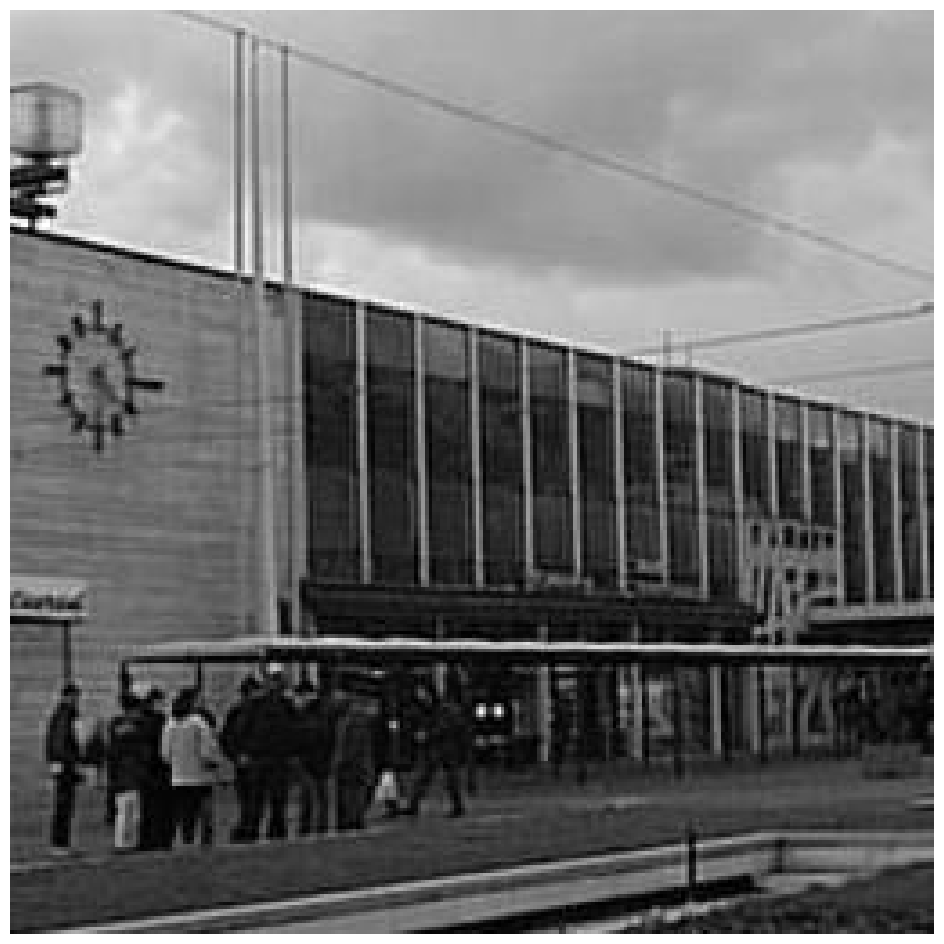

In [23]:
gray_image = cv2.imread(sorted_df.file_jpg_path[0])
# new_rgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
print(gray_image.shape)

plt.figure(figsize=(12, 12))
plt.imshow(gray_image)
plt.axis("off")
plt.show()


In [24]:
prev_shape = None

# 遍歷DataFrame的每一行
for index, row in sorted_df.iterrows():
    file_path = row['file_jpg_path']  # 檔案路徑列的名稱請依您的DataFrame進行修改

    # 讀取圖片並獲取其形狀
    image = cv2.imread(file_path)
    current_shape = image.shape if image is not None else None

    # 檢查形狀是否與前一個檔案的形狀相同
    if prev_shape is None:
        prev_shape = current_shape
    elif current_shape != prev_shape:
        print(current_shape)
        print(f"檔案 {file_path} 的形狀與前一個檔案的形狀不同")
        break
#     else:
#         print(f"檔案 {file_path} 的形狀相同")

    prev_shape = current_shape

(220, 309, 3)
檔案 /kaggle/input/aia-xt122-cv-kaggle/train/livingroom/image_0178.jpg 的形狀與前一個檔案的形狀不同


In [25]:
from concurrent.futures import ThreadPoolExecutor

sz = 256
train_path = sorted_df.file_jpg_path.values
test_path = test_df.file_jpg_path.values

def process_image(idx, path):
    img = cv2.imread(path)
    img = cv2.resize(img, (sz, sz))
    img = img / 255.0  # 將像素值除以 255
    return img

with ThreadPoolExecutor() as executor:
    train_image = np.array(list(executor.map(process_image, range(len(train_path)), train_path)))

with ThreadPoolExecutor() as executor:
    test_image = np.array(list(executor.map(process_image, range(len(test_path)), test_path)))

KeyboardInterrupt: 

In [ ]:
print(train_image.shape)
print(test_image.shape)

In [ ]:
train_image[0]

In [ ]:
plt.imshow(train_image[0])
plt.show()

In [ ]:
train_label = sorted_df.label.values
print(train_label)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_image, train_label, 
                                                    test_size=0.2,random_state=17,
                                                    stratify=train_label)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[420])

In [ ]:
labels_num = 15
def inception_block(x, filters_1x1,
                    filters_3x3_reduce, filters_3x3,
                    filters_5x5_reduce, filters_5x5,
                    filters_pooling):

    path_1 = layers.Conv2D(filters_1x1, (1, 1),
                           padding='same',
                           activation='relu')(x)

    path_2 = layers.Conv2D(filters_3x3_reduce, (1, 1),
                           padding='same',
                           activation='relu')(x)
    path_2 = layers.Conv2D(filters_3x3, (3, 3),
                           padding='same',
                           activation='relu')(path_2)

    path_3 = layers.Conv2D(filters_5x5_reduce, (1, 1),
                           padding='same',
                           activation='relu')(x)
    path_3 = layers.Conv2D(filters_5x5, (5, 5),
                           padding='same',
                           activation='relu')(path_3)

    path_4 = layers.MaxPool2D((3, 3),
                              strides=(1, 1),
                              padding='same')(x)
    path_4 = layers.Conv2D(filters_pooling, (1, 1),
                           padding='same',
                           activation='relu')(path_4)

    return tf.concat([path_1, path_2, path_3, path_4], axis=3)

def auxiliary_classifier(inputs):
    aux = layers.AveragePooling2D((5, 5), strides=3)(inputs)
    aux = layers.Conv2D(128, 1, padding='same', activation='relu')(aux)
    aux = layers.Flatten()(aux)
    aux = layers.Dense(1024, activation='relu')(aux)
    aux = layers.Dropout(0.7)(aux)
    outputs = layers.Dense(15, activation='softmax')(aux)

    return outputs

In [ ]:
tf.keras.backend.clear_session()
inputs = layers.Input(shape=x_train.shape[1:])
x = layers.Resizing(256, 256,
                    interpolation="bilinear",
                    input_shape=x_train.shape[1:])(inputs)
x = layers.Conv2D(64, (7, 7), strides=2,
                  padding='same',
                  activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=2)(x)
x = layers.Conv2D(64, (1, 1), strides=1,
                  padding='same',
                  activation='relu')(x)
x = layers.Conv2D(192, (3, 3), strides=1,
                  padding='same',
                  activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=2)(x)

inception_3a = inception_block(x, filters_1x1=64,
                filters_3x3_reduce=96, filters_3x3=128,
                filters_5x5_reduce=16, filters_5x5=32,
                filters_pooling=32)

inception_3b = inception_block(inception_3a, filters_1x1=128,
                filters_3x3_reduce=128, filters_3x3=192,
                filters_5x5_reduce=32, filters_5x5=96,
                filters_pooling=64)
inception_3b = layers.MaxPooling2D((3, 3), strides=2)(inception_3b)

inception_4a = inception_block(inception_3b, filters_1x1=192,
                filters_3x3_reduce=96, filters_3x3=208,
                filters_5x5_reduce=16, filters_5x5=48,
                filters_pooling=64)

aux_1 = auxiliary_classifier(inception_4a)

inception_4b = inception_block(inception_4a, filters_1x1=160,
                 filters_3x3_reduce=112, filters_3x3=224,
                 filters_5x5_reduce=24, filters_5x5=64,
                 filters_pooling=64)

inception_4c = inception_block(inception_4b, filters_1x1=128,
                 filters_3x3_reduce=128, filters_3x3=256,
                 filters_5x5_reduce=24, filters_5x5=64,
                 filters_pooling=64)

inception_4d = inception_block(inception_4c, filters_1x1=112,
                 filters_3x3_reduce=144, filters_3x3=288,
                 filters_5x5_reduce=32, filters_5x5=64,
                 filters_pooling=64)

aux_2 = auxiliary_classifier(inception_4d)

inception_4e = inception_block(inception_4d, filters_1x1=256,
                 filters_3x3_reduce=160, filters_3x3=320,
                 filters_5x5_reduce=32, filters_5x5=128,
                 filters_pooling=128)

inception_4e = layers.MaxPooling2D((3, 3), strides=2)(inception_4e)

inception_5a = inception_block(inception_4e, filters_1x1=256,
                 filters_3x3_reduce=160, filters_3x3=320,
                 filters_5x5_reduce=32, filters_5x5=128,
                 filters_pooling=128)

inception_5b = inception_block(inception_5a, filters_1x1=384,
                 filters_3x3_reduce=192, filters_3x3=384,
                 filters_5x5_reduce=48, filters_5x5=128,
                 filters_pooling=128)

outputs = layers.GlobalAveragePooling2D()(inception_5b)
outputs = layers.Dropout(0.4)(outputs)
outputs = layers.Dense(labels_num,
                       activation='softmax')(outputs)

In [ ]:
GoogleNet_model = Model(inputs=inputs, outputs=[outputs, aux_1, aux_2])

In [ ]:
inputs = np.ones((128, x_train.shape[1], x_train.shape[2], 3),
                 dtype=np.float32)
GoogleNet_model(inputs)

In [ ]:
GoogleNet_model.compile(
    optimizer='adam',
    loss=[losses.sparse_categorical_crossentropy,
          losses.sparse_categorical_crossentropy,
          losses.sparse_categorical_crossentropy],
    loss_weights=[1, 0.2, 0.2],
    metrics=['accuracy'])

history = GoogleNet_model.fit(x_train, y_train,
                              validation_data=(x_test, y_test),
                              batch_size=128,
                              epochs=10)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['dense_4_accuracy'])
axs[1].plot(history.history['val_dense_4_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [1]:
import tensorflow as tf
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split

IMG_SIZE = 224
BS = 64

# 建立類別名稱轉class idx字典
with open("/kaggle/input/aia-xt122-cv-kaggle/mapping.txt") as f:
    lines = f.readlines()
lines = [l.strip().replace(" ", "") for l in lines]
CLASS_MAP = {pair.split(",")[0]: int(pair.split(",")[1]) for pair in lines}
NUM_CLASS = len(CLASS_MAP)

CLASS_MAP, NUM_CLASS

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

({'CALsuburb': 9,
  'PARoffice': 7,
  'bedroom': 12,
  'coast': 10,
  'forest': 4,
  'highway': 14,
  'industrial': 2,
  'insidecity': 3,
  'kitchen': 0,
  'livingroom': 5,
  'mountain': 8,
  'opencountry': 6,
  'store': 11,
  'street': 1,
  'tallbuilding': 13},
 15)

In [2]:
# 撈取有解答之圖片路徑, 分割train, val路徑
paths = glob("/kaggle/input/aia-xt122-cv-kaggle/train/*/*.jpg")
train_paths, val_paths = train_test_split(paths,
                                          test_size=0.2,
                                          random_state=5566)

len(train_paths), len(val_paths)
# 擷取資料夾名稱轉成類別id
# os.sep: "/"
def paths2labels(paths):
    return [CLASS_MAP[p.split(os.sep)[-2]] for p in paths]

# 影像讀取 & resize
def load_and_resize_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image

# 使用路徑建構 tf.data.Dataset
def build_ds(paths):
    labels = paths2labels(paths) # paths -> labels
    image_ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    image_ds = image_ds.map(lambda path, label: (load_and_resize_image(path), label)) # path -> img, labels
    return image_ds

In [3]:
train_paths[:10], paths2labels(train_paths)[:10]

(['/kaggle/input/aia-xt122-cv-kaggle/train/livingroom/image_0117.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/street/image_0225.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/coast/image_0181.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/industrial/image_0206.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/store/image_0121.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/PARoffice/image_0089.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/highway/image_0130.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/store/image_0208.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/insidecity/image_0043.jpg',
  '/kaggle/input/aia-xt122-cv-kaggle/train/store/image_0138.jpg'],
 [5, 1, 10, 2, 11, 7, 14, 11, 3, 11])

In [4]:
# 建構train, val dataset
train_ds = build_ds(train_paths).shuffle(buffer_size=len(train_paths)).batch(BS)
val_ds = build_ds(val_paths).batch(BS)

In [5]:
class WAIModel(tf.keras.models.Model):
    def __init__(self, encoder, preprocess, freeze):
        super().__init__()
        # 前處理函數
        self.preprocess = preprocess
        # 資料擴增
        self.data_aug = tf.keras.Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
        ])
        # feature extractor
        self.encoder = encoder
        # classifier
        self.classifier = tf.keras.Sequential([
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(NUM_CLASS),
            tf.keras.layers.Softmax(),
        ])
        # freeze: 是否鎖住encoder參數
        if freeze:
            for l in self.encoder.layers:
                l.trainable = False
    def call(self, inputs, training=None):
        x = self.preprocess(inputs)
        # 非訓練時不使用資料擴增
        if training:
            x = self.data_aug(x)

        x = self.encoder(x, training)
        x = self.classifier(x, training)
        return x

In [6]:
# 使用模型對應之前處理函式
preprocess = tf.keras.applications.efficientnet.preprocess_input
encoder = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,
                                                            weights='imagenet')

model = WAIModel(encoder,
                 preprocess,
                 freeze=True)

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint('kaggle-image-classification.hdf5', monitor='val_accuracy', save_best_only=True, mode='auto', verbose=1)
# earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,patience=10, min_lr=0.001)
model.fit(train_ds,
          epochs=20,
          validation_data=val_ds,
          callbacks=[
                  checkpoint,
              ])

Epoch 1/20


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 15) are incompatible


In [12]:
import os
# from keras.preprocessing import image as k_image
import re
import numpy as np
from keras.models import load_model
import keras.utils as image
hdf5_model = load_model('/kaggle/working/kaggle-image-classification.hdf5')   

r_image = re.compile(r'.*\.(jpg|png|gif)$')
test_image = []
test_image_id = []
for file in os.listdir('/kaggle/input/aia-xt122-cv-kaggle/test'):
        img = image.load_img(os.path.join('/kaggle/input/aia-xt122-cv-kaggle/test/{}'.format(file)), target_size=(224, 224))
        img = image.img_to_array(img)
        test_image.append(img)
        test_image_id.append(file.split('.')[0])
        
test_train = np.array(test_image)
test_train_id = np.array(test_image_id)
test_train = test_train * 1./255

ans = hdf5_model.predict(test_train)
result = np.argmax(ans,axis=1) # 因為用 Modle 建 model
result = result.reshape((-1, 1))
test_train_id = test_train_id.reshape((-1, 1))

# import csv
# with open('result_transfer_learning.csv', 'a') as a_writer:
#     for i in range(len(result)):
#         result_r = csv.writer(a_writer, lineterminator='\n')
#         result_r.writerow([test_image_id[i], str(result[i]).lstrip('[').rstrip(']')])



57/57 [==============================] - 3s 59ms/step
                        id label
0     6JXEAHW0JKL00Z71Z5XH     4
1     1IGAUUWIIX4EWX2AJJAH     4
2     K5NLYV7OSO1LILOXJS98     4
3     PFBZV8YADEK6G74CPW4Q     4
4     9OB7FWNDE20JM3FYK0XU     4
...                    ...   ...
1789  PEG259M7E6P3QOC8ULRF     4
1790  QHYZKOXTFP4DKJLRD8ZK     4
1791  VYFDK9WE71D2Q144LJN8     4
1792  KUO02C577601VD1P9PSH     4
1793  5SOYGBHB6YA8LAQQDPG7     4

[1794 rows x 2 columns]
                        id class
0     12VJYE4AE85K3QZZIDGW     4
1     4XLB86I30GZZZEVZBM2O     4
2     TRS0Y4KQO74ET6A7POW8     4
3     0R4BF4JPJL4QG25GNJRH     4
4     YHQSSCEBEBB99DLIRTK8     4
...                    ...   ...
1789  DIXZOGU9DVWFZI3CEW46     4
1790  RVEWYMP1ZQM6NIVP87IP     4
1791  OWVXF4LZ2M702YAXLXBM     4
1792  COQBP8I0ECZMHFUAJI5M     4
1793  KYERCE6YYLALCI3EDOQ3     4

[1794 rows x 2 columns]


In [ ]:
result = [str(i).lstrip('[').rstrip(']') for i in result]
# print(test_train_id)
test_train_id = [str(i).replace("'",'').replace("]",'').replace("[",'') for i in test_train_id]
combined_df = pd.DataFrame({'id': test_train_id, 'label': result})

print(combined_df)
# 讀取原始的 CSV 文件
original_df = pd.read_csv('/kaggle/input/aia-xt122-cv-kaggle/sample_submission.csv')

# 合併兩個 DataFrame，根據 id 欄位進行合併
merged_df = pd.merge(original_df, combined_df, left_on='id', right_on='id', how='left')
# print(merged_df)
# 更新 label 欄位，如果 new_df 中有對應的 label 值就使用它，否則保留原來的值
# merged_df['class'] = merged_df['class'].fillna(merged_df['label'])
merged_df['class'] = merged_df['label']
# 去除多餘的欄位
merged_df = merged_df.drop(['label'], axis=1)
print(merged_df)
# 將更新後的 DataFrame 寫回到原始的 CSV 文件
merged_df.to_csv('merged.csv', index=False)

In [1]:
class_map = {'CALsuburb': 9,
 'PARoffice': 7,
 'bedroom': 12,
 'coast': 10,
 'forest': 4,
 'highway': 14,
 'industrial': 2,
 'insidecity': 3,
 'kitchen': 0,
 'livingroom': 5,
 'mountain': 8,
 'opencountry': 6,
 'store': 11,
 'street': 1,
 'tallbuilding': 13}
# sorted_df['label'] = sorted_df['label'].map(class_map)
# sorted_df
%mkdir /kaggle/working/aia-xt122-cv-kaggle
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/CALsuburb
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/PARoffice
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/bedroom
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/coast
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/forest
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/highway
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/industrial
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/insidecity
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/kitchen
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/livingroom
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/mountain
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/opencountry
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/store
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/street
%mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/tallbuilding

In [2]:
# %mkdir /kaggle/working/aia-xt122-cv-kaggle
# %mkdir /kaggle/working/aia-xt122-cv-kaggle/train_augmented_2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 設置數據擴增參數
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 設置圖片路徑和擴增圖片保存路徑
data_dir = '/kaggle/input/aia-xt122-cv-kaggle/train'
augmented_data_dir = '/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2'

# 遍歷圖片目錄中的每張圖片，進行數據擴增並保存
for root, dirs, files in os.walk(data_dir):
    root11 = root.replace('/kaggle/input/aia-xt122-cv-kaggle/train/','')
#     print(dirs)
#     print(files)
    for file in files:
        img_path = os.path.join(root, file)
        img = load_img(img_path)  # 讀取原始圖片
        x = img_to_array(img)  # 轉換為 NumPy 數組
        x = x.reshape((1,) + x.shape)  # 將數組 reshape 為 batch
        dir_d = augmented_data_dir +'/' +root11
#         print(dir_d)
        # 生成擴增後的圖片
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=dir_d, save_prefix='aug', save_format='jpg'):
            i += 1
            if i > 2:  # 生成 10 張擴增圖片
                break

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
import os
import shutil

data_dir = '/kaggle/input/aia-xt122-cv-kaggle/train'
augmented_data_dir = '/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2'

# 建立目標資料夾
# os.makedirs(augmented_data_dir, exist_ok=True)

# 列出原始資料夾中的資料夾列表
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
print(subfolders)
# 將每個子資料夾中的檔案複製到對應的目標資料夾
for folder in subfolders:
    source_folder = os.path.join(data_dir, folder)
    target_folder = os.path.join(augmented_data_dir, folder)
    print(source_folder)
    print(target_folder)
    # 建立目標子資料夾
#     os.makedirs(target_folder, exist_ok=True)
    
#     複製檔案
    for file_name in os.listdir(source_folder):
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(target_folder, file_name)
        shutil.copy(source_file, target_file)

print("資料複製完成")


['insidecity', 'opencountry', 'mountain', 'highway', 'livingroom', 'CALsuburb', 'PARoffice', 'bedroom', 'kitchen', 'industrial', 'coast', 'tallbuilding', 'street', 'forest', 'store']
/kaggle/input/aia-xt122-cv-kaggle/train/insidecity
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/insidecity
/kaggle/input/aia-xt122-cv-kaggle/train/opencountry
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/opencountry
/kaggle/input/aia-xt122-cv-kaggle/train/mountain
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/mountain
/kaggle/input/aia-xt122-cv-kaggle/train/highway
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/highway
/kaggle/input/aia-xt122-cv-kaggle/train/livingroom
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/livingroom
/kaggle/input/aia-xt122-cv-kaggle/train/CALsuburb
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/CALsuburb
/kaggle/input/aia-xt122-cv-kaggle/train/PARoffice
/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2/PARoffice
/kaggle/input/aia

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet, MobileNetV2, VGG16, VGG19, Xception,ResNet101V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input

# 資料路徑
DATASET_PATH = 'sample'
# 影像大小
IMAGE_SIZE = (224, 224)
# IMAGE_SIZE = (299, 299)
# 影像類別數
NUM_CLASSES = 15
# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 32
# 凍結網路層數
# FREEZE_LAYERS = 1
# Epoch 數
NUM_EPOCHS = 40
# 模型輸出儲存的檔案
WEIGHTS_FINAL = 'model-resnet50-final.h5'

# 假設您的DataFrame稱為df，包含'file_jpg_path'和'label'欄位
# 您需要將路徑改成絕對路徑或相對於DATASET_PATH的路徑

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   validation_split=0.2)

# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input,  # 將預處理函數設置為 preprocess_input
#     validation_split=0.2
# )

train_image_gen = train_datagen.flow_from_directory('/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2',
                                            target_size=IMAGE_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            classes={ 
                                                'kitchen' : 0,
                                                'street' : 1,
                                                'industrial' : 2,
                                                'insidecity' : 3,
                                                'forest' : 4,
                                                'livingroom' : 5,
                                                'opencountry' : 6,
                                                'PARoffice' : 7,
                                                'mountain' : 8,
                                                'CALsuburb' : 9,
                                                'coast' : 10,
                                                'store' : 11,
                                                'bedroom' : 12,
                                                'tallbuilding' : 13,
                                                'highway' :14
                                            },
                                            subset='training')

valid_image_gen = train_datagen.flow_from_directory('/kaggle/working/aia-xt122-cv-kaggle/train_augmented_2',
                                            target_size=IMAGE_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical',
                                            classes={ 
                                                'kitchen' : 0,
                                                'street' : 1,
                                                'industrial' : 2,
                                                'insidecity' : 3,
                                                'forest' : 4,
                                                'livingroom' : 5,
                                                'opencountry' : 6,
                                                'PARoffice' : 7,
                                                'mountain' : 8,
                                                'CALsuburb' : 9,
                                                'coast' : 10,
                                                'store' : 11,
                                                'bedroom' : 12,
                                                'tallbuilding' : 13,
                                                'highway' :14
                                            },
                                            subset='validation')

# print(valid_image_gen[0][0])

Found 8445 images belonging to 15 classes.
Found 2103 images belonging to 15 classes.


In [40]:
base_model = MobileNet(
     weights='imagenet',
     include_top=False # 如果是 true 表示要拿這model的classes 來分類
     )

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(15, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)
for layer in model.layers[:-4]:
  layer.trainable=False
       
for layer in model.layers[-4:]:
  layer.trainable=True


In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
   
checkpoint = ModelCheckpoint('kaggle-image-classification.hdf5', monitor='val_accuracy', save_best_only=True, mode='auto', verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,patience=10, min_lr=0.001)

model_history = model.fit(train_image_gen,
                              epochs=40,
                              steps_per_epoch=(train_image_gen.samples//BATCH_SIZE),
                              validation_data=valid_image_gen,
                              validation_steps=(valid_image_gen.samples//BATCH_SIZE),
                              callbacks=[
                                  checkpoint,
                                  earlystop,
                                  reduce_lr
                              ])

Epoch 1/40
263/263 [==============================] - ETA: 0s - loss: 1.7096 - accuracy: 0.5789
Epoch 1: val_accuracy improved from -inf to 0.77644, saving model to kaggle-image-classification.hdf5
263/263 [==============================] - 26s 86ms/step - loss: 1.7096 - accuracy: 0.5789 - val_loss: 1.0358 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 2/40
263/263 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.8385
Epoch 2: val_accuracy improved from 0.77644 to 0.82788, saving model to kaggle-image-classification.hdf5
263/263 [==============================] - 20s 77ms/step - loss: 0.6978 - accuracy: 0.8385 - val_loss: 0.6262 - val_accuracy: 0.8279 - lr: 0.0010
Epoch 3/40
263/263 [==============================] - ETA: 0s - loss: 0.4666 - accuracy: 0.8745
Epoch 3: val_accuracy improved from 0.82788 to 0.86346, saving model to kaggle-image-classification.hdf5
263/263 [==============================] - 20s 75ms/step - loss: 0.4666 - accuracy: 0.8745 - val_loss: 0.498

In [43]:
import os
# from keras.preprocessing import image as k_image
import re
import numpy as np
from keras.models import load_model
import keras.utils as image
hdf5_model = load_model('/kaggle/working/kaggle-image-classification.hdf5')   

r_image = re.compile(r'.*\.(jpg|png|gif)$')
test_image = []
test_image_id = []
for file in os.listdir('/kaggle/input/aia-xt122-cv-kaggle/test'):
        img = image.load_img(os.path.join('/kaggle/input/aia-xt122-cv-kaggle/test/{}'.format(file)), target_size=(224, 224))
        img = image.img_to_array(img)
        test_image.append(img)
        test_image_id.append(file.split('.')[0])
        
test_train = np.array(test_image)
test_train_id = np.array(test_image_id)
test_train = test_train * 1./255

ans = hdf5_model.predict(test_train)
result = np.argmax(ans,axis=1) # 因為用 Modle 建 model
result = result.reshape((-1, 1))
test_train_id = test_train_id.reshape((-1, 1))

# import csv
# with open('result_transfer_learning.csv', 'a') as a_writer:
#     for i in range(len(result)):
#         result_r = csv.writer(a_writer, lineterminator='\n')
#         result_r.writerow([test_image_id[i], str(result[i]).lstrip('[').rstrip(']')])

57/57 [==============================] - 2s 36ms/step


In [44]:
result = [str(i).lstrip('[').rstrip(']') for i in result]
# print(test_train_id)
test_train_id = [str(i).replace("'",'').replace("]",'').replace("[",'') for i in test_train_id]
combined_df = pd.DataFrame({'id': test_train_id, 'label': result})

print(combined_df)
# 讀取原始的 CSV 文件
original_df = pd.read_csv('/kaggle/input/aia-xt122-cv-kaggle/sample_submission.csv')

# 合併兩個 DataFrame，根據 id 欄位進行合併
merged_df = pd.merge(original_df, combined_df, left_on='id', right_on='id', how='left')
# print(merged_df)
# 更新 label 欄位，如果 new_df 中有對應的 label 值就使用它，否則保留原來的值
# merged_df['class'] = merged_df['class'].fillna(merged_df['label'])
merged_df['class'] = merged_df['label']
# 去除多餘的欄位
merged_df = merged_df.drop(['label'], axis=1)
print(merged_df)
# 將更新後的 DataFrame 寫回到原始的 CSV 文件
merged_df.to_csv('merged.csv', index=False)

                        id label
0     6JXEAHW0JKL00Z71Z5XH     0
1     1IGAUUWIIX4EWX2AJJAH    13
2     K5NLYV7OSO1LILOXJS98     7
3     PFBZV8YADEK6G74CPW4Q     6
4     9OB7FWNDE20JM3FYK0XU     1
...                    ...   ...
1789  PEG259M7E6P3QOC8ULRF     6
1790  QHYZKOXTFP4DKJLRD8ZK     4
1791  VYFDK9WE71D2Q144LJN8     6
1792  KUO02C577601VD1P9PSH     7
1793  5SOYGBHB6YA8LAQQDPG7     1

[1794 rows x 2 columns]
                        id class
0     12VJYE4AE85K3QZZIDGW     4
1     4XLB86I30GZZZEVZBM2O     6
2     TRS0Y4KQO74ET6A7POW8    12
3     0R4BF4JPJL4QG25GNJRH     1
4     YHQSSCEBEBB99DLIRTK8     9
...                    ...   ...
1789  DIXZOGU9DVWFZI3CEW46     0
1790  RVEWYMP1ZQM6NIVP87IP     8
1791  OWVXF4LZ2M702YAXLXBM     6
1792  COQBP8I0ECZMHFUAJI5M    11
1793  KYERCE6YYLALCI3EDOQ3     5

[1794 rows x 2 columns]


In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

# 設定凍結與要進行訓練的網路層
# for layer in model.layers[:FREEZE_LAYERS]:
#     layer.trainable = False
# for layer in model.layers[FREEZE_LAYERS:]:
#     layer.trainable = True

# 編譯模型
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_generator.samples // BATCH_SIZE,
          epochs=NUM_EPOCHS)

In [ ]:
# Create a model based on pretrained ResNet50 without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model.output
x = Flatten()(x)

# Add a Dropout layer
x = Dropout(0.5)(x)

# Add a Dense layer with softmax activation for class probabilities
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# Create the final model with specified frozen and trainable layers
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# Compile the model with Adam optimizer and lower learning rate for fine-tuning
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(
#     optimizer='adam',
#     loss=[losses.sparse_categorical_crossentropy,
#           losses.sparse_categorical_crossentropy,
#           losses.sparse_categorical_crossentropy],
#     loss_weights=[1, 0.2, 0.2],
#     metrics=['accuracy'])

# Print the model summary
# print(model.summary())

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_generator.samples // BATCH_SIZE,
          epochs=NUM_EPOCHS)

# Save the trained model
# model.save(WEIGHTS_FINAL)


In [ ]:
from concurrent.futures import ThreadPoolExecutor

sz = 224
test_path = test_df.file_jpg_path.values

def process_image(idx, path):
    img = cv2.imread(path)
    img = cv2.resize(img, (sz, sz))
    img = img / 255.0  # 將像素值除以 255
    return img

with ThreadPoolExecutor() as executor:
    test_image = np.array(list(executor.map(process_image, range(len(test_path)), test_path)))

In [ ]:
a = model.predict(test_image)

In [ ]:
result = np.argmax(a,axis=1)
print(result)